<a href="https://colab.research.google.com/github/Bhavya-31/9921103089/blob/main/Optimized_Charging_%26_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)


In [3]:
# Number of samples
num_samples = 1000

# Generate synthetic data
temperature = np.random.uniform(10, 35, num_samples)  # Temperature in °C
distance_needed = np.random.uniform(5, 150, num_samples)  # Distance needed in km
battery_soc = np.random.uniform(20, 100, num_samples)  # State of Charge (SoC) in %
optimal_charging_time = (150 - battery_soc) + (distance_needed * 0.2) + (35 - temperature) * 0.5 + np.random.normal(0, 5, num_samples)

# Create DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'distance_needed': distance_needed,
    'battery_soc': battery_soc,
    'optimal_charging_time': optimal_charging_time
})

# Display the first few rows
data.head()


,temperature,distance_needed,battery_soc,optimal_charging_time
0,19.363503,31.844275,40.936455,128.550331
1,33.767858,83.575637,39.758304,130.657924
2,28.299849,131.577146,92.500366,90.582985
3,24.966462,111.172609,39.963696,130.457816
4,13.900466,121.951366,41.755978,149.243782


In [4]:
# Split the data into training and testing sets
X = data[['temperature', 'distance_needed', 'battery_soc']]
y = data['optimal_charging_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")


Mean Squared Error on Test Set: 37.84


In [5]:
def get_charging_schedule(temperature, distance_needed, battery_soc):
    """Predict optimal charging time based on input conditions."""
    input_data = pd.DataFrame({
        'temperature': [temperature],
        'distance_needed': [distance_needed],
        'battery_soc': [battery_soc]
    })
    optimal_time = model.predict(input_data)[0]
    return optimal_time

# Simulate optimized charging schedules under different conditions
conditions = [
    {'temperature': 15, 'distance_needed': 50, 'battery_soc': 30},
    {'temperature': 25, 'distance_needed': 120, 'battery_soc': 50},
    {'temperature': 30, 'distance_needed': 20, 'battery_soc': 80}
]

schedules = []
for condition in conditions:
    time = get_charging_schedule(condition['temperature'], condition['distance_needed'], condition['battery_soc'])
    schedules.append({
        'temperature': condition['temperature'],
        'distance_needed': condition['distance_needed'],
        'battery_soc': condition['battery_soc'],
        'optimal_charging_time': time
    })

schedule_df = pd.DataFrame(schedules)
print(schedule_df)


   temperature  distance_needed  battery_soc  optimal_charging_time
0           15               50           30             137.332389
1           25              120           50             126.334281
2           30               20           80              73.907651


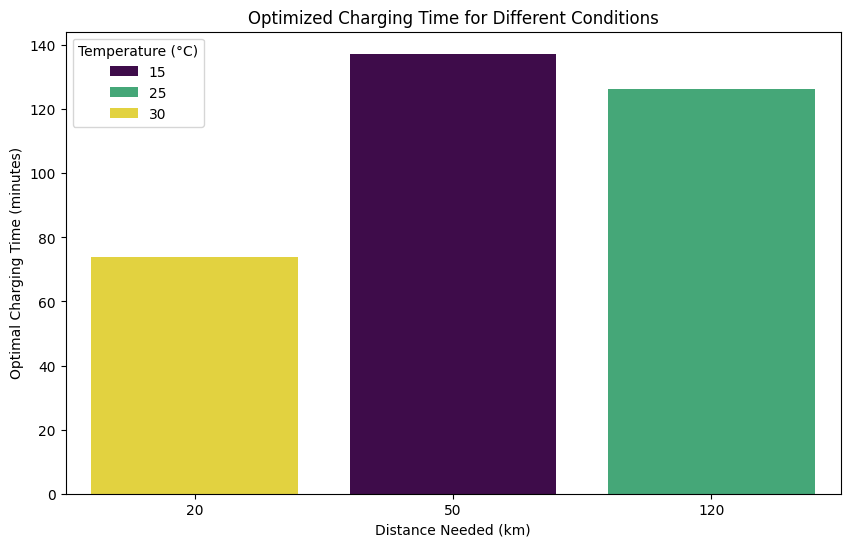

In [6]:
# Plotting optimized charging schedules
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_needed', y='optimal_charging_time', hue='temperature', data=schedule_df, palette='viridis')
plt.xlabel("Distance Needed (km)")
plt.ylabel("Optimal Charging Time (minutes)")
plt.title("Optimized Charging Time for Different Conditions")
plt.legend(title="Temperature (°C)")
plt.show()
